# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=c50ed6501b7a41f66d34d7f8a05f54b7'

In [4]:
# Checking my connection
weather_response = requests.get(target_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "sunrise": 1592268262,
        "sunset": 1592331377,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 99
            },
            "dt": 1592265600,
            "dt_txt": "2020-06-16 00:00:00",
            "main": {
                "feels_like": 289.14,
                "grnd_level": 1004,
                "humidity": 84,
                "pressure": 1020,
                "sea_level": 1020,
                "temp": 290.03,
                "temp_kf": 0.4,
                "temp_max": 290.03,
                "temp_min": 289.63
            },
            "sys": {
                "pod": "n"
            },
            "weather": [
                {
                    "description": "overcast clouds",
                    "icon": 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("Completed")

Processing record 1 of Set 1 | uusikaupunki
Processing record 2 of Set 1 | thompson
Processing record 3 of Set 1 | dikson
Record not found
Processing record 4 of Set 1 | ushuaia
Processing record 5 of Set 1 | busselton
Processing record 6 of Set 1 | auning
Processing record 7 of Set 1 | tasiilaq
Processing record 8 of Set 1 | hobart
Processing record 9 of Set 1 | punta arenas
Processing record 10 of Set 1 | wangqing
Processing record 11 of Set 1 | khatanga
Processing record 12 of Set 1 | cape town
Processing record 13 of Set 1 | marfino
Processing record 14 of Set 1 | port elizabeth
Processing record 15 of Set 1 | yellowknife
Processing record 16 of Set 1 | port alfred
Record not found
Record not found
Processing record 17 of Set 1 | warrenton
Processing record 18 of Set 1 | taksimo
Record not found
Processing record 19 of Set 1 | kritsa
Processing record 20 of Set 1 | savannakhet
Processing record 21 of Set 1 | qaanaaq
Processing record 22 of Set 1 | santander
Processing record 23 of 

Processing record 188 of Set 1 | karratha
Processing record 189 of Set 1 | sao simao
Processing record 190 of Set 1 | port-cartier
Processing record 191 of Set 1 | avarua
Processing record 192 of Set 1 | alice springs
Processing record 193 of Set 1 | malibu
Processing record 194 of Set 1 | ghanzi
Processing record 195 of Set 1 | banda aceh
Record not found
Processing record 196 of Set 1 | necochea
Processing record 197 of Set 1 | batemans bay
Processing record 198 of Set 1 | lagoa
Processing record 199 of Set 1 | andenes
Processing record 200 of Set 1 | yazman
Processing record 201 of Set 1 | honiara
Record not found
Processing record 202 of Set 1 | varberg
Processing record 203 of Set 1 | hofn
Processing record 204 of Set 1 | maputo
Processing record 205 of Set 1 | yamada
Processing record 206 of Set 1 | yilan
Processing record 207 of Set 1 | salalah
Processing record 208 of Set 1 | taoudenni
Processing record 209 of Set 1 | vuktyl
Processing record 210 of Set 1 | visby
Processing rec

Processing record 378 of Set 1 | puerto escondido
Processing record 379 of Set 1 | isangel
Processing record 380 of Set 1 | bagaces
Processing record 381 of Set 1 | bol
Processing record 382 of Set 1 | chico
Processing record 383 of Set 1 | turukhansk
Processing record 384 of Set 1 | belmonte
Record not found
Processing record 385 of Set 1 | svetlyy
Processing record 386 of Set 1 | uglovka
Processing record 387 of Set 1 | caluquembe
Processing record 388 of Set 1 | vyazma
Processing record 389 of Set 1 | manokwari
Processing record 390 of Set 1 | santo tomas
Processing record 391 of Set 1 | high prairie
Processing record 392 of Set 1 | chumikan
Processing record 393 of Set 1 | atar
Processing record 394 of Set 1 | dryden
Processing record 395 of Set 1 | asuncion nochixtlan
Record not found
Processing record 396 of Set 1 | padang
Processing record 397 of Set 1 | ust-ishim
Processing record 398 of Set 1 | mazagao
Processing record 399 of Set 1 | yichang
Processing record 400 of Set 1 | c

Processing record 570 of Set 1 | opuwo
Processing record 571 of Set 1 | gusau
Processing record 572 of Set 1 | micheldorf
Processing record 573 of Set 1 | solwezi
Processing record 574 of Set 1 | candolim
Processing record 575 of Set 1 | chaves
Processing record 576 of Set 1 | koudougou
Processing record 577 of Set 1 | halifax
Processing record 578 of Set 1 | araouane
Processing record 579 of Set 1 | pozo colorado
Processing record 580 of Set 1 | sajanan
Processing record 581 of Set 1 | elat
Processing record 582 of Set 1 | baykit
Processing record 583 of Set 1 | ambagarh chauki
Processing record 584 of Set 1 | cascais
Processing record 585 of Set 1 | lishui
Processing record 586 of Set 1 | abidjan
Processing record 587 of Set 1 | jacareacanga
Processing record 588 of Set 1 | batagay
Processing record 589 of Set 1 | alihe
Processing record 590 of Set 1 | baiyin
Processing record 591 of Set 1 | arlit
Processing record 592 of Set 1 | honningsvag
Completed


In [6]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uusikaupunki,60.8004,21.4084,61.20,69,0,5.66,FI,1592265600
1,Thompson,55.7435,-97.8558,68.85,82,84,11.52,CA,1592265600
2,Dikson,73.5069,80.5464,33.94,98,100,13.31,RU,1592265600
3,Ushuaia,-54.8000,-68.3000,39.83,77,52,6.73,AR,1592265600
4,Busselton,-33.6500,115.3333,59.83,77,97,7.72,AU,1592265600


In [7]:
# Export the City_Data into a csv
# weather_data.to_csv(w'output_data\my_weather_data.csv')
# Show Record Count
countform = len(weather_data)
countform

592

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

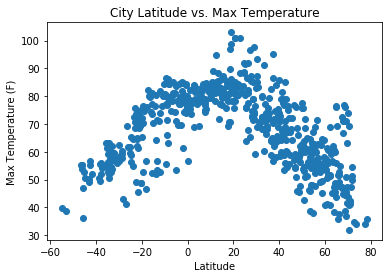

In [10]:
scatter_lat = weather_data["Latitude"]
scatter_temp = weather_data["Max Temp"]

plt.scatter(scatter_lat,scatter_temp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('..\output_data\Lat vs Max Temp')
plt.show()

#### Latitude vs. Humidity Plot

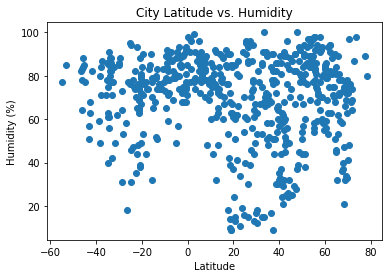

In [12]:
scatter_hum = weather_data["Humidity"]

plt.scatter(scatter_lat,scatter_hum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('..\output_data\Lat vs Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

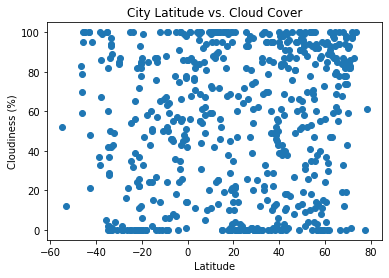

In [14]:
scatter_cloud = weather_data["Cloudiness"]

plt.scatter(scatter_lat,scatter_cloud)
plt.title('City Latitude vs. Cloud Cover')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('..\output_data\Lat vs Cloud Cover')
plt.show()

#### Latitude vs. Wind Speed Plot

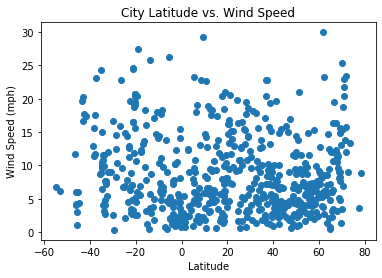

In [15]:
scatter_windsp = weather_data["Wind Speed"]

plt.scatter(scatter_lat,scatter_windsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('..\output_data\Lat vs Wind Speed')
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Uusikaupunki,60.8004,21.4084,61.20,69,0,5.66,FI,1592265600
1,Thompson,55.7435,-97.8558,68.85,82,84,11.52,CA,1592265600
2,Dikson,73.5069,80.5464,33.94,98,100,13.31,RU,1592265600
5,Auning,56.4308,10.3782,57.45,68,0,6.58,DK,1592265600
6,Tasiilaq,65.6145,-37.6368,35.96,89,73,2.35,GL,1592265600


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7749434631472589


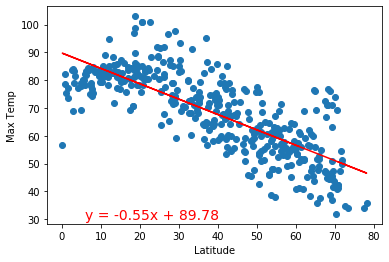

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northern Temp vs Linear Regression')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7706063760134177


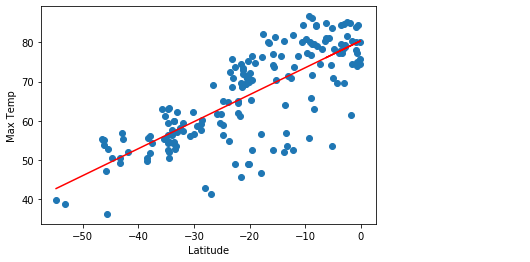

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southern Temp vs Linear Regression')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.00427045221579537


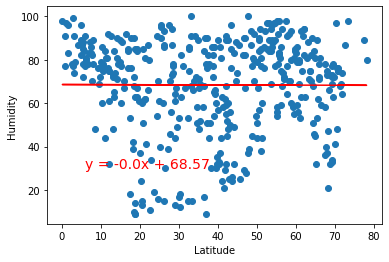

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northern Humidity vs Linear Regression')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1600927224446781


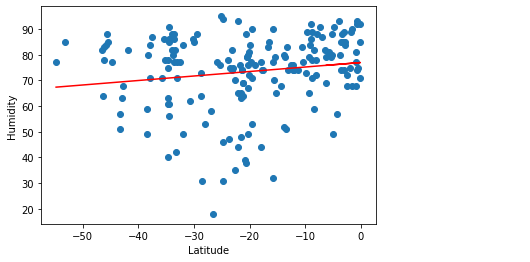

The low r values indicate a weak to no relationship between humidity and latitude.


<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('Southern humidity vs Linear Regression')

print("The low r values indicate a weak to no relationship between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.042281845291688845


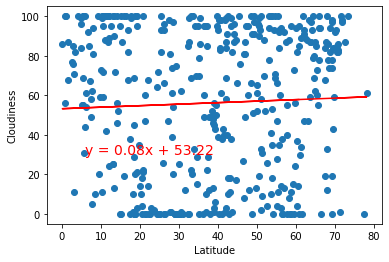

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northern Cloud vs Linear Regression')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.06592230467784904


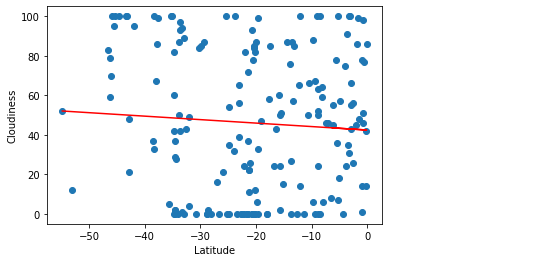

The low r values indicate a weak positive relationship between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [28]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('Southern cloud vs Linear Regression')

print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.01725951441883582


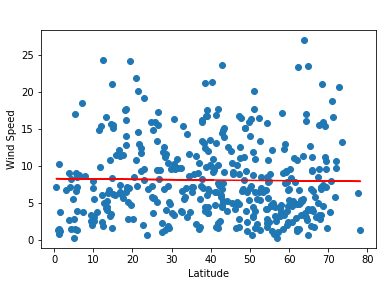

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northern wind vs Linear Regression')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.024333887365850303


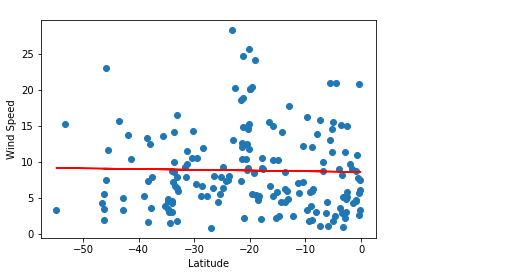

The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('Southern Wind vs Linear Regression')

print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")
      